In [1]:
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

from pathlib import Path
path = Path("data")

### Creating maps with Python

Learning objectives:

- Familiarize with the packages available for mapping
- Create simple static maps
- Plot data over images
- Load and plot shapefiles 
- Re-project data

In [2]:
import pandas as pd


fname = path.joinpath("challenger_path.csv")
df = pd.read_csv(fname, names=["lon", "lat"])
df.head()

,lon,lat
0,357.860901,50.755560
1,352.606665,49.193427
2,350.015499,48.599226
3,349.146243,44.531685
4,350.133827,42.989428


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


def make_basemap(projection='robin', figsize=(9, 9),
                 resolution='c'):
    fig, ax = plt.subplots(figsize=figsize)
    m = Basemap(projection=projection, resolution=resolution,
                lon_0=0, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color='0.85')
    return fig, m

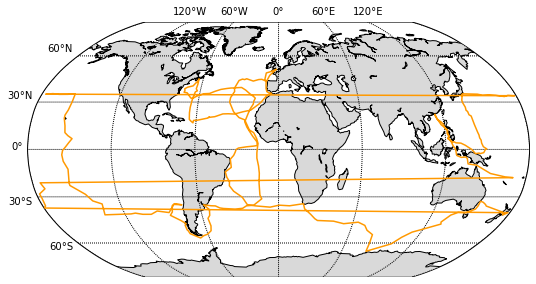

In [4]:
fig, m = make_basemap()

kw = {"color": "#FF9900", "linestyle": "-", "linewidth": 1.5}
parallels = range(-60, 90, 30)
meridians = range(-360, 360, 60)
m.drawparallels(parallels, labels=[1, 0, 0, 0])
m.drawmeridians(meridians, labels=[0, 0, 1, 0])

df["x"], df["y"] = m(df["lon"].values, df["lat"].values)
m.plot(df["x"].values, df["y"].values, **kw);

In [5]:
from IPython.display import IFrame

src = "https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement"
IFrame(src, width=700, height=500)

In [6]:
import cartopy.crs as ccrs


def make_map(projection=ccrs.PlateCarree(), figsize=(5, 5)):
    fig, ax = plt.subplots(
        figsize=figsize,
        subplot_kw={"projection": projection})
    return fig, ax

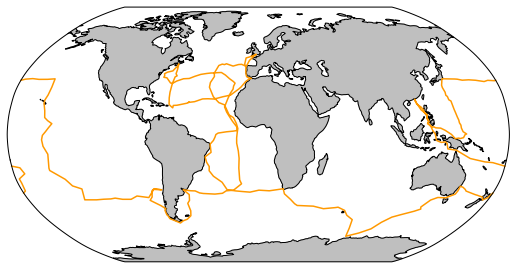

In [7]:
import cartopy.feature as cfeature


fig, ax = make_map(projection=ccrs.Robinson(), figsize=(9, 9))

ax.set_global()
ax.coastlines(resolution="110m", color="k")
ax.add_feature(cfeature.LAND, facecolor="0.75")

ax.plot(df["lon"], df["lat"], transform=ccrs.Geodetic(), **kw);

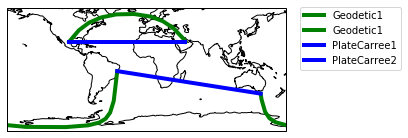

In [8]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.coastlines()

kw = {"linewidth": 4, "color": "g", "transform": ccrs.Geodetic()}
ax.plot([-100, 50], [25, 25], label="Geodetic1", **kw)
ax.plot([-38, 147], [-13, -42], label="Geodetic1", **kw)

kw.update({"color": "b", "transform": ccrs.PlateCarree()})
ax.plot([-100, 50], [25, 25], label="PlateCarree1", **kw)
ax.plot([-38, 147], [-13, -42], label="PlateCarree2", **kw)

ax.legend(loc=(1.05, 0.5));

<div class="alert alert-success" style="font-size:80%">
<b>Exercise 00: check what `cartopy` adds to the mpl `ax`.</b><br><br>

tips:

- create a `plt.axes()` object;
- create a new one with a projection;
- compare new methods were added on the second one.

</div>

{'read_user_background_images', 'add_wmts', 'get_extent', 'hold_limits', 'natural_earth_shp', 'gridlines', 'outline_patch', 'coastlines', 'add_raster', 'add_wms', 'background_img', 'add_geometries', 'set_boundary', 'add_feature', 'img_factories', 'set_extent', 'projection', 'tissot', 'set_global', 'background_patch', 'stock_img'}
(-180.0, 180.0, -90.0, 90.0)


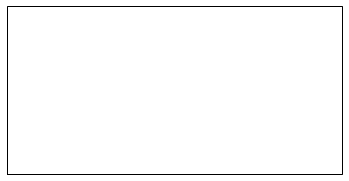

In [9]:
# %load 01-basemap_cartopy-00-sol.py
ax0 = plt.axes();
ax1 = plt.axes(projection=ccrs.PlateCarree());

mpl = [obj for obj in dir(ax0) if not obj.startswith('_')]
cart = [obj for obj in dir(ax1) if not obj.startswith('_')]

print(set(mpl).symmetric_difference(cart))
print(ax1.get_extent())

<div class="alert alert-info" style="font-size:80%">
<b>REFERENCE</b>: <br><br>

<ul>
  <li>`coastlines`</li>
  <li>`set_global`</li>
  <li>`gridlines`</li>
  <li>`add_feature`</li>
  <li>`set_extent`</li>
  <li>`projection`</li>
  <li>`get_extent`</li>
</ul>

</div>

<div class="alert alert-warning" style="font-size:80%">
<b>REFERENCE</b>: <br><br>

<ul>
  <li>`img_factories`</li>
  <li>`natural_earth_shp`</li>
  <li>`outline_patch`</li>
  <li>`read_user_background_images`</li>
  <li>`set_boundary`</li>
  <li>`tissot`</li>
  <li>`add_geometries`</li>
  <li>`add_raster`</li>
  <li>`add_wms`</li>
  <li>`add_wmts`</li>
  <li>`background_img`</li>
  <li>`background_patch`</li>
  <li>`hold_limits`</li>
</ul>

</div>

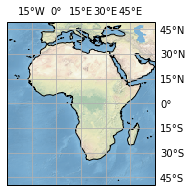

In [10]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import (LONGITUDE_FORMATTER,
                                   LATITUDE_FORMATTER)
fig, ax = make_map(projection=ccrs.PlateCarree(), figsize=(3, 3))
ax.stock_img()

coastline = cfeature.GSHHSFeature(scale="coarse")
ax.add_feature(coastline)

gl = ax.gridlines(draw_labels=True)
gl.xlabels_bottom = gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-30, -15, 0, 15, 30, 45, 60])
ax.set_extent([-30, 60, -40, 40])

<div class="alert alert-success" style="font-size:80%">
<b>Exercise 01: repeat the map above and change.</b><br><br>

- the line style: `ax.gridlines(some opts)`
- the y label style: `ylabel_style(dict with text opts)`
</div>

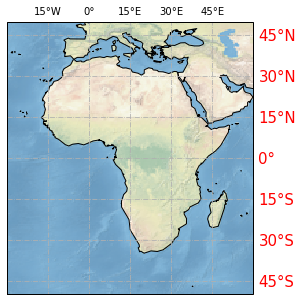

In [11]:
# %load 01-basemap_cartopy-01-sol.py
fig, ax = make_map(projection=ccrs.PlateCarree())

coastline = cfeature.GSHHSFeature(scale='coarse')
ax.add_feature(coastline)
ax.stock_img()

gl = ax.gridlines(draw_labels=True, linestyle='-.')

gl.xlabels_bottom = gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-30, -15, 0, 15, 30, 45, 60])

ax.set_extent([-30, 60, -40, 40])

gl.ylabel_style = {'size': 15, 'color': 'red'}


### Natural Earth

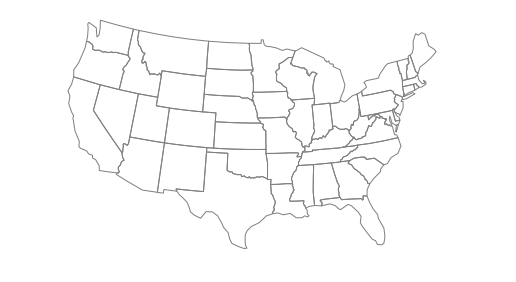

In [12]:
from cartopy.feature import NaturalEarthFeature

fig, ax = make_map(projection=ccrs.LambertConformal(), 
                   figsize=(9, 9))
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

states = NaturalEarthFeature(category="cultural", scale="110m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
feat = ax.add_feature(states, edgecolor="gray")

### Image overlay

In [13]:
lon = [-40.77, -40.51, -40.30, -40.23, -40.13, -40.06, -39.99,
       -39.87, -39.72, -39.52, -39.32, -39.11, -38.91, -38.71]
lat = [-21.29, -21.39, -21.48, -21.51, -21.56, -21.58, -21.62,
       -21.69, -21.76, -21.86, -21.96, -22.08, -22.15, -22.25]

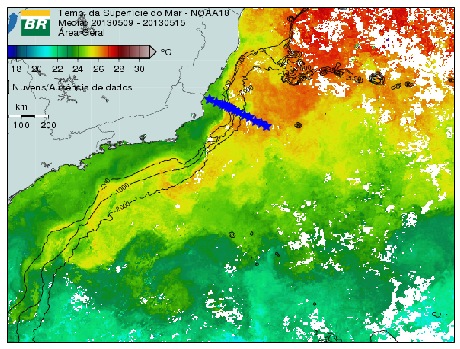

In [14]:
fig, ax = make_map(projection=ccrs.PlateCarree(), figsize=(8, 8))

fname = path.joinpath("AVHRR.png")
img = plt.imread(str(fname))
img_extent = (-48, -32, -30, -18)

ax.imshow(img, origin="upper", extent=img_extent,
          transform=ccrs.PlateCarree())

lines = ax.plot(lon, lat, "b", marker="*", markersize=10)

### Shapefiles

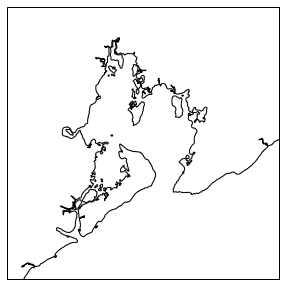

In [15]:
extent = [-39, -38.25, -13.25, -12.5]
coastline = cfeature.GSHHSFeature(scale="full")

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)
art = ax.add_feature(coastline)

In [16]:
import geopandas

fname = path.joinpath("BTS", "BTS.shp")
gdf = geopandas.read_file(str(fname))

gdf

,id,geometry
0,123,(POLYGON ((-39.56228762227976 -18.101679490141...


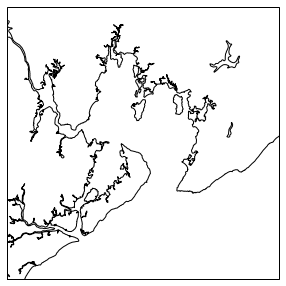

In [17]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

geometry = gdf["geometry"].iloc[0]
ax.add_geometries([geometry], ccrs.PlateCarree(),
                  facecolor="w", edgecolor="black");

### Re-projecting data

In [18]:
fname = path.joinpath("rivers_BTS.xlsx")

df = pd.read_excel(fname)

df.head()

,river,point,datum,x,y
0,Jaguaripe,1,WGS84,517361.0,8549537.0
1,Jaguaripe,2,WGS84,515112.0,8550391.0
2,Jaguaripe,3,WGS84,512196.0,8550832.0
3,Jaguaripe,4,WGS84,509157.0,8551134.0
4,Jaguaripe,5,WGS84,507021.0,8551643.0


In [19]:
from pyproj import Proj

proj_string = [
    "+proj=utm",
    "+zone=24L",
    "+south",
    "+ellps=WGS84",
    "+datum=WGS84",
    "+units=m",
    "+no_defs",
]
    
utm = Proj(" ".join(proj_string))

df["lon"], df["lat"] = utm(df["x"].values,
                           df["y"].values, inverse=True)
df.head()

,river,point,datum,x,y,lon,lat
0,Jaguaripe,1,WGS84,517361.0,8549537.0,-38.839827,-13.120464
1,Jaguaripe,2,WGS84,515112.0,8550391.0,-38.860580,-13.112754
2,Jaguaripe,3,WGS84,512196.0,8550832.0,-38.887485,-13.108779
3,Jaguaripe,4,WGS84,509157.0,8551134.0,-38.915522,-13.106059
4,Jaguaripe,5,WGS84,507021.0,8551643.0,-38.935229,-13.101462


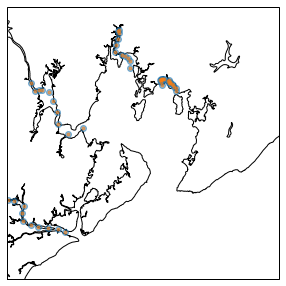

In [20]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

ax.add_geometries([geometry], ccrs.PlateCarree(),
                  facecolor="w", edgecolor="black")
ax.plot(df["lon"], df["lat"], "o", alpha=0.5)

globe = ccrs.Globe(datum="WGS84", ellipse="WGS84")
transform = ccrs.UTM(zone=24, southern_hemisphere=True,
                     globe=globe)

ax.plot(df["x"], df["y"], ".", alpha=0.5, transform=transform);

Exercise - Create a map for your region of interest with:

- Coastline
- Political boundaries
- Tweak for "publication"
- Bonus point if you add bathymetry and your own data

# Questions?

![https://xkcd.com/977/](https://imgs.xkcd.com/comics/map_projections.png)